In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import json
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
df = pd.read_csv('C:/python/datas/crime_datas')
df.head()

,Unnamed: 0,구별,발생 합계,검거 합계,살인 발생,강도 발생,"강간, 강제추행 발생",절도 발생,폭력 발생,"강간, 강제추행 검거율",강도검거율,살인검거율,절도검거율,폭력검거율,검거율 합계,인구수
0,0,강남구,6146.0,4397.0,12.0,25.0,578.0,2372.0,3159.0,78.55,92.00,91.67,48.90,87.02,71.542467,581760
1,1,강동구,3458.0,2462.0,3.0,6.0,124.0,1612.0,1713.0,83.06,100.00,100.00,55.15,85.29,71.197224,463321
2,2,강북구,2301.0,1912.0,4.0,1.0,136.0,777.0,1383.0,84.56,100.00,100.00,69.11,90.74,83.094307,334426
3,3,강서구,3896.0,3044.0,9.0,3.0,246.0,1540.0,2098.0,76.42,100.00,77.78,59.81,91.75,78.131417,595691
4,4,관악구,4444.0,3134.0,8.0,7.0,321.0,1860.0,2248.0,83.80,85.71,50.00,49.95,85.68,70.522052,529031


In [3]:
del df['Unnamed: 0']

In [4]:
df.rename(columns = {'살인 발생': '살인', 
                     '강도 발생': '강도',
                     '강간, 강제추행 발생': '강간, 강제추행',
                     '절도 발생': '절도',
                     '폭력 발생': '폭력'}, inplace=True)
del df['발생 합계']
del df['검거 합계']
df

,구별,살인,강도,"강간, 강제추행",절도,폭력,"강간, 강제추행 검거율",강도검거율,살인검거율,절도검거율,폭력검거율,검거율 합계,인구수
0,강남구,12.0,25.0,578.0,2372.0,3159.0,78.55,92.00,91.67,48.90,87.02,71.542467,581760
1,강동구,3.0,6.0,124.0,1612.0,1713.0,83.06,100.00,100.00,55.15,85.29,71.197224,463321
2,강북구,4.0,1.0,136.0,777.0,1383.0,84.56,100.00,100.00,69.11,90.74,83.094307,334426
3,강서구,9.0,3.0,246.0,1540.0,2098.0,76.42,100.00,77.78,59.81,91.75,78.131417,595691
4,관악구,8.0,7.0,321.0,1860.0,2248.0,83.80,85.71,50.00,49.95,85.68,70.522052,529031
5,광진구,5.0,4.0,208.0,1414.0,1456.0,77.40,100.00,60.00,53.32,87.91,71.331390,375180
6,구로구,5.0,2.0,182.0,1390.0,1907.0,64.84,50.00,100.00,55.40,80.60,69.736087,454604
7,금천구,7.0,3.0,134.0,1013.0,1282.0,76.87,100.00,85.71,51.33,86.43,71.381714,256167
8,노원구,6.0,3.0,156.0,1361.0,1899.0,80.77,100.00,100.00,48.05,79.67,67.211679,578221
9,도봉구,2.0,2.0,72.0,772.0,1012.0,88.89,50.00,100.00,48.70,84.09,69.569892,353241


In [13]:
target_col = ['살인', '강도', '강간, 강제추행', '절도', '폭력']
weight_col = df[target_col].max()

crime_count_norm = df[target_col]/weight_col
crime_count_norm.head()

,살인,강도,"강간, 강제추행",절도,폭력
구별,,,,,
강남구,1.000000,1.00,1.000000,1.000000,1.000000
강동구,0.250000,0.24,0.214533,0.679595,0.542260
강북구,0.333333,0.04,0.235294,0.327572,0.437797
강서구,0.750000,0.12,0.425606,0.649241,0.664134
관악구,0.666667,0.28,0.555363,0.784148,0.711618


In [6]:
df.set_index('구별', inplace=True)
df

,살인,강도,"강간, 강제추행",절도,폭력,"강간, 강제추행 검거율",강도검거율,살인검거율,절도검거율,폭력검거율,검거율 합계,인구수
구별,,,,,,,,,,,,
강남구,12.0,25.0,578.0,2372.0,3159.0,78.55,92.00,91.67,48.90,87.02,71.542467,581760
강동구,3.0,6.0,124.0,1612.0,1713.0,83.06,100.00,100.00,55.15,85.29,71.197224,463321
강북구,4.0,1.0,136.0,777.0,1383.0,84.56,100.00,100.00,69.11,90.74,83.094307,334426
강서구,9.0,3.0,246.0,1540.0,2098.0,76.42,100.00,77.78,59.81,91.75,78.131417,595691
관악구,8.0,7.0,321.0,1860.0,2248.0,83.80,85.71,50.00,49.95,85.68,70.522052,529031
광진구,5.0,4.0,208.0,1414.0,1456.0,77.40,100.00,60.00,53.32,87.91,71.331390,375180
구로구,5.0,2.0,182.0,1390.0,1907.0,64.84,50.00,100.00,55.40,80.60,69.736087,454604
금천구,7.0,3.0,134.0,1013.0,1282.0,76.87,100.00,85.71,51.33,86.43,71.381714,256167
노원구,6.0,3.0,156.0,1361.0,1899.0,80.77,100.00,100.00,48.05,79.67,67.211679,578221


In [7]:
df.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

In [8]:
import matplotlib as mpl

In [9]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    mpl.font_manager.fontManager.addfont(font)
    # print(mpl.font_manager.FontProperties(fname=font).get_name())

In [10]:
mpl.rcParams['font.family'] = 'NanumBarunGothicOTF'
print(mpl.rcParams['font.family'])

['NanumBarunGothicOTF']


In [14]:
crime_count_norm.sort_values(by='살인', ascending=False)

,살인,강도,"강간, 강제추행",절도,폭력
구별,,,,,
강남구,1.000000,1.00,1.000000,1.000000,1.000000
서초구,0.750000,0.20,0.539792,0.633642,0.578348
강서구,0.750000,0.12,0.425606,0.649241,0.664134
관악구,0.666667,0.28,0.555363,0.784148,0.711618
영등포구,0.666667,0.44,0.482699,0.721754,0.686610
금천구,0.583333,0.12,0.231834,0.427066,0.405825
중구,0.500000,0.24,0.278547,0.539207,0.446027
노원구,0.500000,0.12,0.269896,0.573777,0.601140
종로구,0.500000,0.16,0.269896,0.454890,0.464387


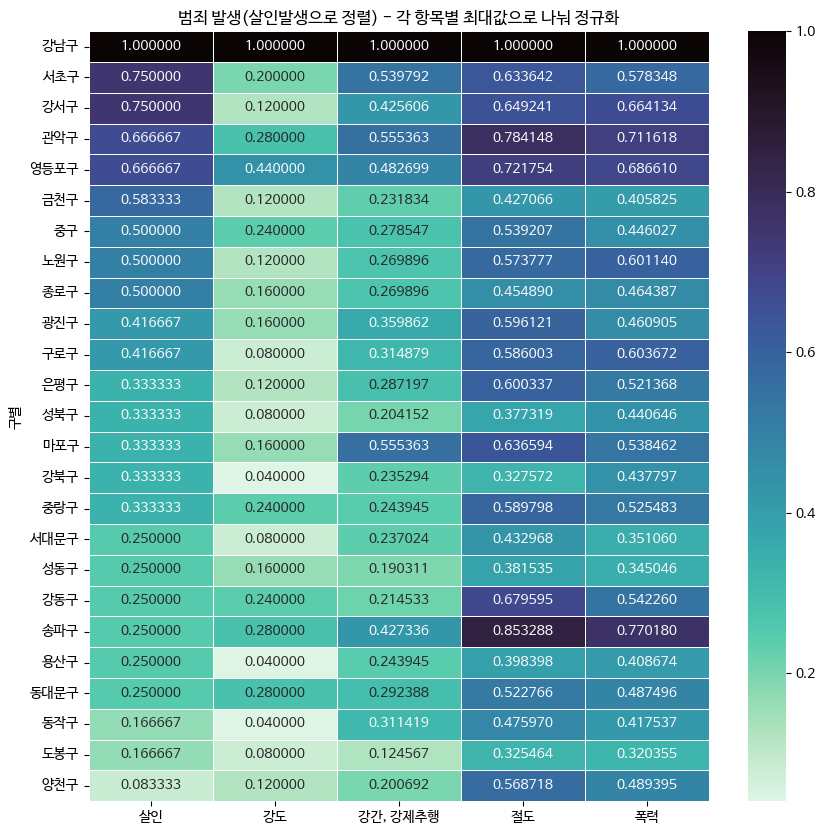

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='mako_r')
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()